<div class="alert alert-success">

# **Assignment 1 - Classification**
## **Artificial Intelligence II | ESADE**

### **Objective**
The goal of this assignment is to develop a supervised classification model to predict whether a loan will default. The analysis will be based on the Lending Club dataset, following the complete machine learning lifecycle.

1) **Goals Definition**  
   - Specify the business problem.  
   - Define the unit of analysis and prediction target.  
   - Prioritize model criteria.  

2) **Data Preparation**  
   - **Data Exploration**: Understand feature distributions, missing values, and data types.  
   - **Data Cleaning**: Handle missing values, remove irrelevant columns.  
   - **Feature Engineering**: Create new variables to improve model performance.  
   - **Feature Selection**: Identify the most predictive variables.  

3) **Model Creation**  
   - Define the **target variable** (`loan_status`).  
   - Train different **classification models**:
     - Decision Trees  
     - Random Forest  
     - Logistic Regression  
     - Gradient Boosting (XGBoost, LightGBM)  
   - Compare model performance on training and testing data.  
   - Apply **balancing techniques** if needed (oversampling, undersampling).  

4) **Model Interpretation**  
   - Identify the most relevant **performance metrics**:
     - Precision, Recall, F1-Score, AUC-ROC.  
   - Generate **confusion matrices** for different models.  
   - Interpret results based on **investment strategies** (Conservative, Balanced, Aggressive).  

5) **Model Implementation**  
   - Compare the **confusion matrices** of different models.  
   - Analyze the **business impact** of FP, FN, TP, TN.  
   - **Modify the decision threshold** to balance cost sensitivity.  
   - Apply the model to **"open" loans** to estimate business impact.  
   - Recommend the **optimal investment strategy** based on profitability vs. risk.  


</div>

<div class="alert alert-info">

### 🔹 **Dataset Loading & Overview**  

We loaded the dataset using `pandas.read_csv()`, handling large file issues with `low_memory=False`.  
- Used `df.info()` to check **size, data types, and missing values**.  
- Previewed data with `df.head()` to understand its structure.  

📌 **Next step**: Analyze missing values and prepare data for cleaning.  

</div>

In [1]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Libraries for models and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Other statistical tools
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
# Import necessary libraries
import pandas as pd

# Define the file path
file_path = "/Users/oriolventuramiro/Documents/Esade/Term 2/AI II/Assignment 1/Loan_Lending_Club (USE THIS ONE).csv"

# Load the full dataset
df = pd.read_csv(file_path, low_memory=False)

# Display general information about the dataset
df.info()

# Display the first rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(2), object(34)
memory usage: 2.1+ GB


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,2,119321612,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,118659541,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,Feb-2020,Apr-2020,Feb-2020,3.0,21.0,DELINQUENT,177.96231,10197.78,59.68,N


<div class="alert alert-info">

## Data Exploration

### 🔹 Missing Values Analysis  

We analyze missing values to determine whether to **drop or impute** affected columns.  
- Calculated the **missing percentage** for each column.  
- Sorted columns **by missing values**.  
- Identified the most affected ones for review.  

📌 **Next step**: Decide which columns to **drop or impute** before feature selection.  

</div>

In [3]:
df_cleaned = df.copy()

# 📌 Remove all rows where 'application_type' is "Joint App"
df_cleaned = df_cleaned[df_cleaned["application_type"] != "Joint App"]

columns_to_drop = [
    'Unnamed: 0', 'id', 'url', 'application_type', 'zip_code', 'title',
    
    # Post-issuance information
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',

    # Financial hardship and debt settlement features
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
    'deferral_term', 'hardship_amount', 'hardship_start_date', 
    'hardship_end_date', 'hardship_length', 'hardship_dpd', 
    'hardship_loan_status', 'hardship_payoff_balance_amount', 
    'hardship_last_payment_amount',

    # Performance recovery metrics
    'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee',

    # ❗ Additional columns removed by your teammate:
    'revol_util', 'num_tl_120dpd_2m', 'sec_app_earliest_cr_line', 
    'pymnt_plan', 'last_fico_range_high', 'last_fico_range_low',
    'days_since_last_pymnt', 'days_since_last_credit_pull', 'days_until_next_pymnt'
]

# 📌 Apply column removal
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# 📌 Check the new shape of the dataset
print(f"✅ New dataset size after removing irrelevant columns and filtering closed loans: {df_cleaned.shape}")

✅ New dataset size after removing irrelevant columns and filtering closed loans: (1909242, 104)


In [4]:
# 📌 Convert 'term' and 'emp_length' to numeric values
df_cleaned['term'] = df_cleaned['term'].str.replace(' months', '', regex=True).astype(float)
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace(r'(years|year|<|\+)', '', regex=True)
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'], errors='coerce')

# 📌 Convert 'issue_d' to datetime
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format='%Y-%m-%d', errors='coerce')

# 📌 Split 'earliest_cr_line' into month and year
df_cleaned[['earliest_cr_line_month', 'earliest_cr_line_year']] = df_cleaned['earliest_cr_line'].str.split('-', expand=True)

# 📌 Extract useful information from 'issue_d'
df_cleaned['issue_year'] = df_cleaned['issue_d'].dt.year
df_cleaned['issue_month'] = df_cleaned['issue_d'].dt.month
df_cleaned['issue_dayofweek'] = df_cleaned['issue_d'].dt.dayofweek

# 📌 Month mapping to convert to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df_cleaned['earliest_cr_line_month'] = df_cleaned['earliest_cr_line_month'].map(month_map)
df_cleaned['earliest_cr_line_year'] = pd.to_numeric(df_cleaned['earliest_cr_line_year'])

# 📌 Drop original date columns
df_cleaned = df_cleaned.drop(columns=['issue_d', 'earliest_cr_line'])

In [5]:
# 📌 Function to clean text-type columns that contain disguised numeric values
def clean_column(col):
    col = col.astype(str).str.strip()  # Remove leading/trailing whitespace
    col = col.str.replace(r"[%,$,;;,']", '', regex=True)  # Remove special characters
    converted = pd.to_numeric(col, errors='coerce')  # Try to convert to numeric
    
    if converted.notna().sum() > 0:  # If there are numeric values, return the converted version
        return converted
    
    return col  # If still text, keep it as is

# 📌 Apply cleaning to all categorical columns
for col in df_cleaned.select_dtypes(include=['object', 'category']).columns:
    df_cleaned[col] = clean_column(df_cleaned[col])

# 📌 Replace 'nan' strings with actual NaN values
df_cleaned.replace('nan', np.nan, inplace=True)

# 📌 Verify changes
print("✅ Column cleaning completed.")
print(df_cleaned.dtypes.value_counts())  # See how many columns are numeric vs categorical

✅ Column cleaning completed.
float64    92
object     10
int32       3
int64       2
Name: count, dtype: int64


/var/folders/kk/zvd0jkpj4mv8wt27q6zf4wmr0000gn/T/ipykernel_80441/3974140908.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.replace('nan', np.nan, inplace=True)


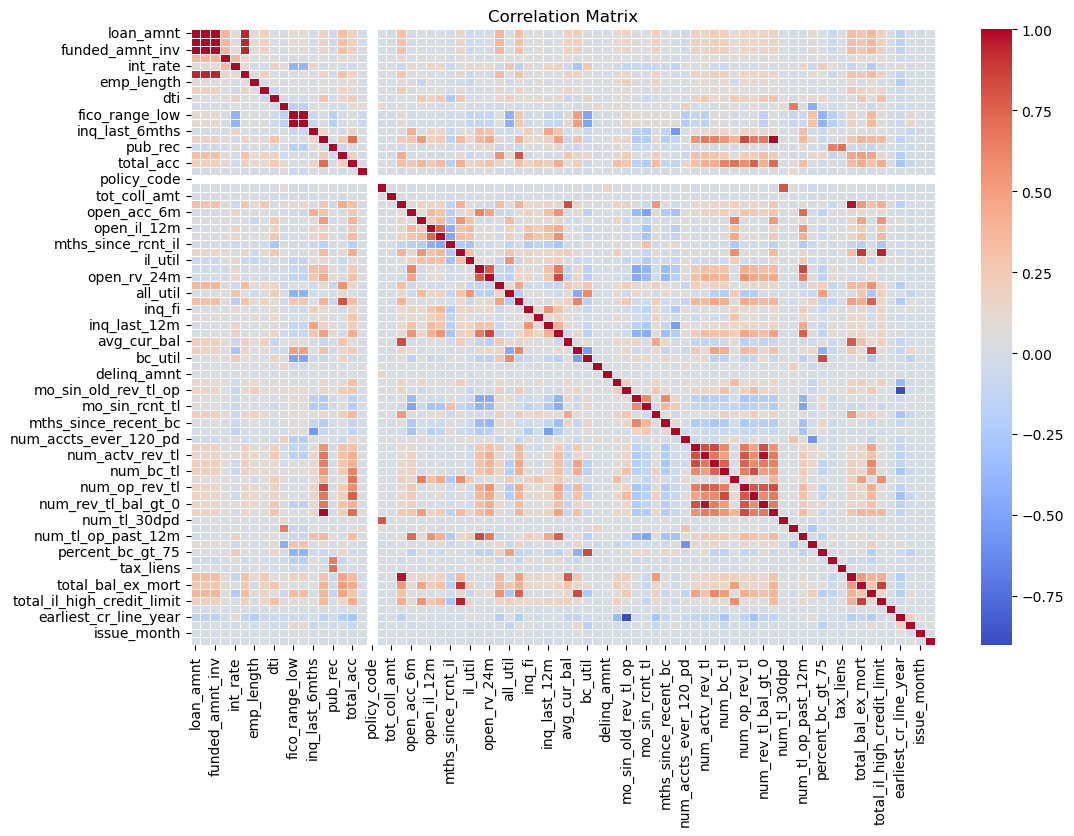

✅ Removed 20 highly correlated columns.


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 📌 1️⃣ Remove columns with more than 50% missing values
percentage_missing = df_cleaned.isna().mean() * 100
columns_to_drop = percentage_missing[percentage_missing > 50].index
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# 📌 2️⃣ Identify numeric and categorical columns
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# 📌 3️⃣ Apply Chi-squared test to remove irrelevant categorical variables
df_cleaned['loan_status'] = df_cleaned['loan_status'].astype('category')
insignificant_categorical_features = []

for col in categorical_columns:
    if df_cleaned[col].nunique() > 1:  # Avoid columns with only one unique value
        try:
            contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['loan_status'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p >= 0.05:  # If p-value is high, the variable has no relationship with loan_status
                insignificant_categorical_features.append(col)
        except ValueError:
            continue

df_processed = df_cleaned.drop(columns=insignificant_categorical_features)

correlation_matrix = df_processed[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 📌 6️⃣ Remove highly correlated features
threshold = 0.80  # Correlation threshold
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
df_processed = df_processed.drop(columns=high_corr_features)

print(f"✅ Removed {len(high_corr_features)} highly correlated columns.")

In [7]:
# 📌 Fix outlier values in home_ownership in `df_processed`
df_processed['home_ownership'] = df_processed['home_ownership'].replace("NONE", np.nan)

# 📌 Remove rows with null values in 'home_ownership'
df_processed = df_processed.dropna(subset=['home_ownership'])

# 📌 Verify that the value "None" has been removed
print(df_processed['home_ownership'].value_counts(dropna=False))

home_ownership
MORTGAGE    915611
RENT        769717
OWN         222918
ANY            995
Name: count, dtype: int64


In [8]:
# 📌 Re-detect categorical columns after removing irrelevant ones
object_columns = df_processed.select_dtypes(include=['object', 'category']).columns
for col in object_columns:
    unique_val = df_processed[col].unique()
    print(f"🔍 Unique values in '{col}': {unique_val}")

# 📌 Standardize values to 'Title Case' format
for col in object_columns:
    df_processed[col] = df_processed[col].astype(str).str.title()

# 📌 Verify unique values again after standardization
for col in object_columns:
    unique_val = df_processed[col].unique()
    print(f"✅ Unique values in '{col}' after standardization: {unique_val}")

🔍 Unique values in 'grade': ['A' 'B' 'C' 'D' 'F' 'G' 'E']
🔍 Unique values in 'sub_grade': ['A5' 'B5' 'C4' 'B1' 'C2' 'C5' 'D1' 'F1' 'G2' 'E4' 'E3' 'D5' 'D3' 'C1'
 'A2' 'C3' 'B4' 'D4' 'A1' 'D2' 'B2' 'E2' 'A4' 'F4' 'A3' 'F5' 'B3' 'G3'
 'F2' 'F3' 'E5' 'G5' 'G4' 'E1' 'G1']
🔍 Unique values in 'home_ownership': ['OWN' 'MORTGAGE' 'RENT' 'ANY']
🔍 Unique values in 'verification_status': ['Source Verified' 'Verified' 'Not Verified']
🔍 Unique values in 'loan_status': ['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default']
Categories (7, object): ['Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']
🔍 Unique values in 'purpose': ['debt_consolidation' 'credit_card' 'other' 'medical' 'home_improvement'
 'major_purchase' 'small_business' 'house' 'car' 'moving' 'vacation'
 'renewable_energy' 'educational' 'wedding']
🔍 Unique values in 'addr_state': ['CA' 'NJ' 'TX' 'VA' 'IL' 'OR' 'MA' 'C

In [9]:
# 📌 Display all available columns in df_processed
print("📌 Current columns in the dataset:")
print(df_processed.columns.tolist())

# 📌 See how many columns there are in total
print(f"✅ Total number of columns: {df_processed.shape[1]}")

📌 Current columns in the dataset:
['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'de

<div class="alert alert-info">

### **3. Define Independent and Dependent Variables**  
- **Dependent variable (y):** `loan_status`, converted into a **binary classification**:  
  - **1** → Defaulted (e.g., *Default, Charged Off*).  
  - **0** → Fully Paid (e.g., *Fully Paid*).  

- **Independent variables (X):** All relevant features except those that indicate **leakage**, **post-loan performance**, or are **irrelevant** to prediction.

</div>

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 📌 Filter Closed Loans (with label) and Open Loans (without label)
df_closed_loans = df_processed[df_processed['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])].copy()
df_open_loans = df_processed[df_processed['loan_status'].isin(['Current', 'In Grace Period', 'Late 16-30 days', 'Late 31-120 days'])].copy()

# 📌 Define target variable and transform labels for Closed Loans
y_closed = df_closed_loans['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0, 'Default': 0})
X_closed = df_closed_loans.drop(columns=['loan_status'])  # Remove labels after mapping

# 📌 Save Open Loans for later analysis (remove `loan_status`)
X_open = df_open_loans.drop(columns=['loan_status'], errors='ignore').copy()

# 📌 Check dataset dimensions
print(f"✅ Closed Loans: X_closed={X_closed.shape}, y_closed={y_closed.shape}")
print(f"✅ Open Loans (unlabeled): X_open={X_open.shape}")

# 📌 Stratify and reduce Closed Loans dataset to 10% before splitting
sample_fraction = 0.1
X_sample, _, y_sample, _ = train_test_split(X_closed, y_closed, test_size=1 - sample_fraction, random_state=42, stratify=y_closed)

# 📌 Apply undersampling to balance the Closed Loans dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_sample, y_sample)

# 📌 Save feature names
features_names = X_sample.columns

# 📌 Train-test split for the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42, train_size=0.8, stratify=y_sample)

# 📌 Train-test split for the balanced dataset
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled, y_resampled, random_state=42, train_size=0.8, stratify=y_resampled)

# 📌 Convert to DataFrame and Series for consistency
X_train = pd.DataFrame(X_train, columns=features_names)
X_test = pd.DataFrame(X_test, columns=features_names)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

X_train_under = pd.DataFrame(X_train_under, columns=features_names)
X_test_under = pd.DataFrame(X_test_under, columns=features_names)
y_train_under = pd.Series(y_train_under)
y_test_under = pd.Series(y_test_under)

# 📌 Update lists of numeric, categorical, and nominal columns
numeric_columns = X_sample.select_dtypes(include=['number']).columns.tolist()
categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status']
nominal_columns = ['pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'debt_settlement_flag']

# 📌 Verify dataset sizes
print(f"✅ X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"✅ X_train_under: {X_train_under.shape}, X_test_under: {X_test_under.shape}")
print(f"✅ X_open (Open Loans): {X_open.shape}")
print(f"✅ y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"✅ y_train_under: {y_train_under.shape}, y_test_under: {y_test_under.shape}")
print(f"✅ Numeric columns: {len(numeric_columns)}, Categorical columns: {len(categorical_columns)}, Nominal columns: {len(nominal_columns)}")

✅ Closed Loans: X_closed=(1493637, 64), y_closed=(1493637,)
✅ Open Loans (unlabeled): X_open=(405938, 64)
✅ X_train: (119490, 64), X_test: (29873, 64)
✅ X_train_under: (47820, 64), X_test_under: (11956, 64)
✅ X_open (Open Loans): (405938, 64)
✅ y_train: (119490,), y_test: (29873,)
✅ y_train_under: (47820,), y_test_under: (11956,)
✅ Numeric columns: 56, Categorical columns: 4, Nominal columns: 5


In [11]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

# 📌 Define categories for ordinal encoding (only if the columns still exist)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 
                   'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 
                   'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 
                   'G1', 'G2', 'G3', 'G4', 'G5']
home_ownership_order = ['Own', 'Mortgage', 'Rent', 'Any']
verification_status_order = ['Source Verified', 'Verified', 'Not Verified']

# 📌 Define columns for One-Hot Encoding
onehot_columns = ['pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'debt_settlement_flag']

# 📌 Identify numeric columns with missing values for imputation
missing_numeric_cols = X_closed[numeric_columns].isna().sum()  # <- Now in `X_closed`
cols_with_missing = missing_numeric_cols[missing_numeric_cols > 0].index.tolist()

# 📌 Calculate skewness in numeric features for transformation and scaling
skewness = df_closed_loans.skew(numeric_only=True)  # <- Now in `df_closed_loans`
highly_skewed = skewness[abs(skewness) > 1].index
medium_skewed = skewness[(abs(skewness) <= 1) & (abs(skewness) > 0.5)].index

# 📌 Create a separate list of non-highly skewed columns to avoid double transformation
non_skewed_numeric_cols = list(set(numeric_columns) - set(highly_skewed))

# 📌 Define transformations for skewed columns
log_transformer = FunctionTransformer(np.log1p)  # <- Log correction
power_transformer = PowerTransformer()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

# 📌 Define transformation for numeric variables
num_transformer = ColumnTransformer([
    ('log_transformation', log_transformer, highly_skewed),
    ('power_transformation', power_transformer, medium_skewed),
    ('scaling', MinMaxScaler(), non_skewed_numeric_cols)
], 
    remainder='passthrough', 
    verbose_feature_names_out=True
).set_output(transform="pandas")

# 📌 Pipeline for numeric variables
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('num_transformer', num_transformer)
])

# 📌 Pipeline for ordinal categorical variables (with logical order)
categorical_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(categories=[
        grade_order, 
        sub_grade_order, 
        home_ownership_order, 
        verification_status_order
    ]))
])

# 📌 Pipeline for nominal categorical variables (without logical order)
nominal_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Remove 'pymnt_plan' from nominal_columns if it's no longer in X_train
nominal_columns = [col for col in nominal_columns if col in X_train.columns]

# Verify that the list only contains columns that actually exist in the data
print("Nominal columns after filtering:", nominal_columns)

# 📌 Combine everything into a preprocessor
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns),
    ('nominal', nominal_pipeline, nominal_columns)
], 
    remainder='passthrough', 
    verbose_feature_names_out=True
).set_output(transform="pandas")

# 📌 Define final pipeline with the model
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

Nominal columns after filtering: ['purpose', 'addr_state', 'initial_list_status', 'debt_settlement_flag']


In [13]:
# Define a grid to test various models
param_grid = [
    {'model': [LogisticRegression()],
     'model__class_weight': ['balanced', None],
     'model__C': [0.1, 1, 10],
     'model__solver': ['liblinear', 'saga']},

    {'model': [DecisionTreeClassifier()],
     'model__max_depth': [5, 10, 15],
     'model__min_samples_split': [2, 5],
     'model__criterion': ['gini', 'entropy']},

    {'model': [RandomForestClassifier()],
     'model__n_estimators': [100, 200],
     'model__max_depth': [5, 10, 15],
     'model__min_samples_split': [2, 5]},

    {'model': [XGBClassifier()],
     'model__learning_rate': [0.01, 0.1, 0.2],
     'model__n_estimators': [100, 200],
     'model__max_depth': [3, 6, 9]}
]

# Metrics will be stored within a DataFrame to make comparison between models easier
results = []
results_undersampled = []


In [14]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

# 📌 Fitting the models over the full dataset
for params in ParameterGrid(param_grid):
    # Extract the model and make a copy of the hyperparameters
    model = params['model']
    hyperparams = params.copy()
    hyperparams.pop('model')  # Remove 'model' key, leaving only hyperparameters

    # 📌 Recreate the pipeline each iteration to avoid overwriting previous models
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 📌 Set the hyperparameters
    pipe.set_params(**hyperparams)

    # 📌 Fit the model on training data
    pipe.fit(X_train, y_train)

    # 📌 Predict on test data
    y_pred = pipe.predict(X_test)

    # 📌 Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)  # Keep as 2D array

    # 📌 Save results
    results.append({
        'model': type(model).__name__,
        'hyperparameters': hyperparams,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm  # Keep 2D matrix
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x,

                     model                                    hyperparameters  \
0       LogisticRegression  {'model__C': 0.1, 'model__class_weight': 'bala...   
1       LogisticRegression  {'model__C': 0.1, 'model__class_weight': 'bala...   
2       LogisticRegression  {'model__C': 0.1, 'model__class_weight': None,...   
3       LogisticRegression  {'model__C': 0.1, 'model__class_weight': None,...   
4       LogisticRegression  {'model__C': 1, 'model__class_weight': 'balanc...   
5       LogisticRegression  {'model__C': 1, 'model__class_weight': 'balanc...   
6       LogisticRegression  {'model__C': 1, 'model__class_weight': None, '...   
7       LogisticRegression  {'model__C': 1, 'model__class_weight': None, '...   
8       LogisticRegression  {'model__C': 10, 'model__class_weight': 'balan...   
9       LogisticRegression  {'model__C': 10, 'model__class_weight': 'balan...   
10      LogisticRegression  {'model__C': 10, 'model__class_weight': None, ...   
11      LogisticRegression  

In [15]:
# 📌 Fitting the models over the undersampled dataset
for params in ParameterGrid(param_grid):
    # Extract the model and make a copy of the hyperparameters
    model = params['model']
    hyperparams = params.copy()
    hyperparams.pop('model')  # Remove 'model' key, leaving only hyperparameters

    # 📌 Recreate the pipeline each iteration to avoid overwriting previous models
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 📌 Set the hyperparameters
    pipe.set_params(**hyperparams)

    # 📌 Fit the model on undersampled training data
    pipe.fit(X_train_under, y_train_under)

    # 📌 Predict on undersampled test data
    y_pred_under = pipe.predict(X_test_under)

    # 📌 Calculate metrics
    acc = accuracy_score(y_test_under, y_pred_under)
    prec = precision_score(y_test_under, y_pred_under, average='weighted')
    rec = recall_score(y_test_under, y_pred_under, average='weighted')
    f1 = f1_score(y_test_under, y_pred_under, average='weighted')
    cm = confusion_matrix(y_test_under, y_pred_under)  # Keep as 2D matrix

    # 📌 Save results
    results_undersampled.append({
        'model': type(model).__name__,
        'hyperparameters': hyperparams,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm  # Keep 2D matrix
    })

# Convert to DataFrame
results_undersampled_df = pd.DataFrame(results_undersampled)
print(results_undersampled_df)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x,

                     model                                    hyperparameters  \
0       LogisticRegression  {'model__C': 0.1, 'model__class_weight': 'bala...   
1       LogisticRegression  {'model__C': 0.1, 'model__class_weight': 'bala...   
2       LogisticRegression  {'model__C': 0.1, 'model__class_weight': None,...   
3       LogisticRegression  {'model__C': 0.1, 'model__class_weight': None,...   
4       LogisticRegression  {'model__C': 1, 'model__class_weight': 'balanc...   
5       LogisticRegression  {'model__C': 1, 'model__class_weight': 'balanc...   
6       LogisticRegression  {'model__C': 1, 'model__class_weight': None, '...   
7       LogisticRegression  {'model__C': 1, 'model__class_weight': None, '...   
8       LogisticRegression  {'model__C': 10, 'model__class_weight': 'balan...   
9       LogisticRegression  {'model__C': 10, 'model__class_weight': 'balan...   
10      LogisticRegression  {'model__C': 10, 'model__class_weight': None, ...   
11      LogisticRegression  

In [16]:
import numpy as np

# Identifying the best performing models based on different evaluation metrics.
best_model_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
print("Best Model based on Accuracy:")
print(best_model_accuracy[['model', 'hyperparameters', 'accuracy']])

best_model_precision = results_df.loc[results_df['precision'].idxmax()]
print("Best Model based on Precision:")
print(best_model_precision[['model', 'hyperparameters', 'precision']])

best_model_recall = results_df.loc[results_df['recall'].idxmax()]
print("Best Model based on Recall:")
print(best_model_recall[['model', 'hyperparameters', 'recall']])

best_model_f1 = results_df.loc[results_df['f1_score'].idxmax()]
print("Best Model based on F1 Score:")
print(best_model_f1[['model', 'hyperparameters', 'f1_score']])

results_df['false_positives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[0, 1])  # FP = [0,1]
results_df['false_negatives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[1, 0])  # FN = [1,0]

best_model_fp_minimized = results_df.loc[results_df['false_positives'].idxmin()]
print("Best Model minimizing False Positives (FP):")
print(best_model_fp_minimized[['model', 'hyperparameters', 'false_positives', 'false_negatives']])

best_model_fn_minimized = results_df.loc[results_df['false_negatives'].idxmin()]
print("Best Model minimizing False Negatives (FN):")
print(best_model_fn_minimized[['model', 'hyperparameters', 'false_positives', 'false_negatives']])

Best Model based on Accuracy:
model                                                  XGBClassifier
hyperparameters    {'model__learning_rate': 0.1, 'model__max_dept...
accuracy                                                    0.832692
Name: 43, dtype: object
Best Model based on Precision:
model                                         DecisionTreeClassifier
hyperparameters    {'model__criterion': 'gini', 'model__max_depth...
precision                                                   0.860194
Name: 12, dtype: object
Best Model based on Recall:
model                                                  XGBClassifier
hyperparameters    {'model__learning_rate': 0.1, 'model__max_dept...
recall                                                      0.832692
Name: 43, dtype: object
Best Model based on F1 Score:
model                                                  XGBClassifier
hyperparameters    {'model__learning_rate': 0.1, 'model__max_dept...
f1_score                                          

In [17]:
fp_max = results_df.loc[results_df['false_positives'].idxmax()]
print("Model maximizing False Positives (FP):")
print(fp_max[['model', 'hyperparameters', 'false_positives', 'false_negatives']])

fn_max = results_df.loc[results_df['false_negatives'].idxmax()]
print("Model maximizing False Negatives (FN):")
print(fn_max[['model', 'hyperparameters', 'false_positives', 'false_negatives']])

Model maximizing False Positives (FP):
model                                         DecisionTreeClassifier
hyperparameters    {'model__criterion': 'gini', 'model__max_depth...
false_positives                                                 5061
false_negatives                                                    0
Name: 12, dtype: object
Model maximizing False Negatives (FN):
model                                             LogisticRegression
hyperparameters    {'model__C': 10, 'model__class_weight': 'balan...
false_positives                                                 1971
false_negatives                                                 6865
Name: 8, dtype: object


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Generate and display the classification report
report = classification_report(y_test, y_pred, digits=2, output_dict=True)

# 📌 Print key metrics
print(f"Accuracy: {report['accuracy']:.2f}")
print(f"Macro Avg: Precision={report['macro avg']['precision']:.2f}, Recall={report['macro avg']['recall']:.2f}, F1-Score={report['macro avg']['f1-score']:.2f}")
print(f"Weighted Avg: Precision={report['weighted avg']['precision']:.2f}, Recall={report['weighted avg']['recall']:.2f}, F1-Score={report['weighted avg']['f1-score']:.2f}")

# 📌 Print the classification report in tabular format
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))

# 📌 Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 📌 Display the confusion matrix
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.83
Macro Avg: Precision=0.77, Recall=0.61, F1-Score=0.63
Weighted Avg: Precision=0.81, Recall=0.83, F1-Score=0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.24      0.36      5978
           1       0.84      0.97      0.90     23895

    accuracy                           0.83     29873
   macro avg       0.77      0.61      0.63     29873
weighted avg       0.81      0.83      0.79     29873


Confusion Matrix:
[[ 1457  4521]
 [  633 23262]]


<div class="alert alert-info">

Point 1 of model implementation: We have accomplished the first step of the "Model Implementation" by comparing the confusion matrices of the different models. The visualizations of the confusion matrices confirm that we have evaluated the performance of each model in terms of correct and incorrect predictions.

</div>

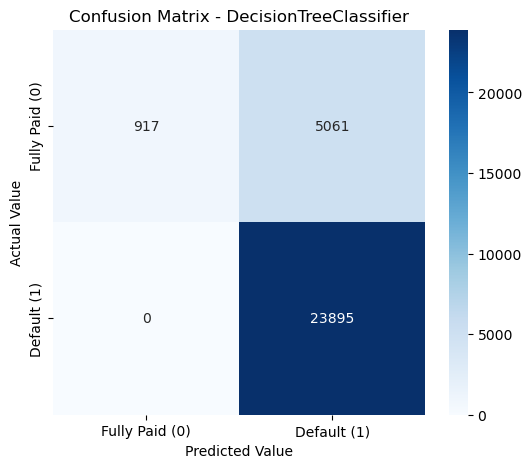

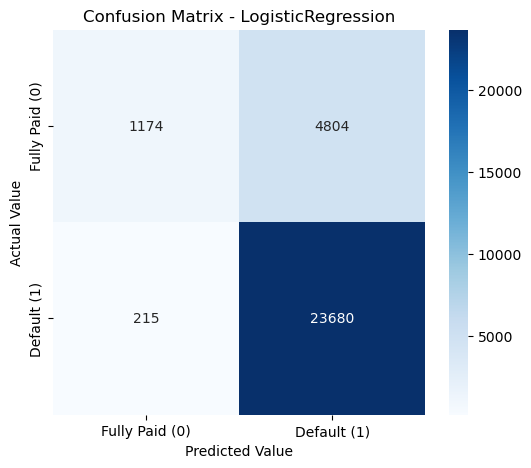

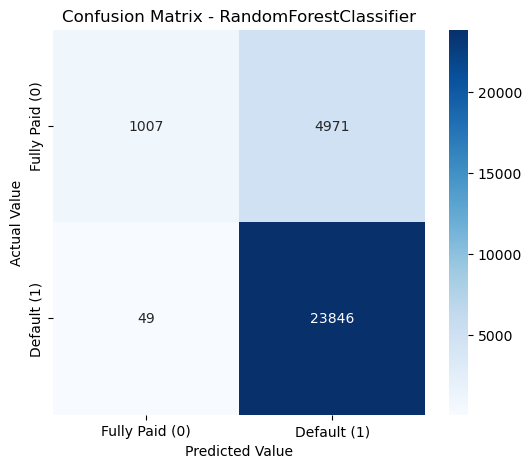

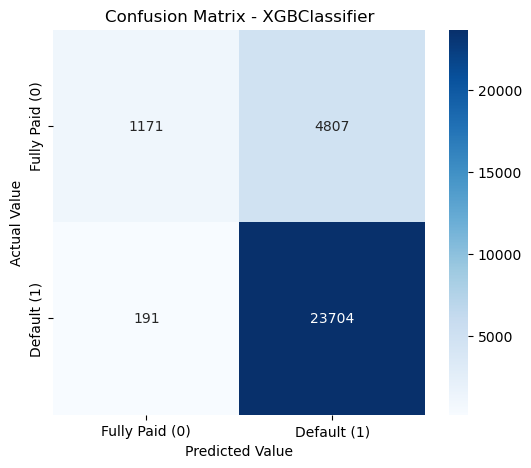

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 📌 Get the best models based on F1-score
best_models = results_df.loc[results_df.groupby('model')['accuracy'].idxmax()]

# 📌 Iterate over the best models and generate a confusion matrix for each model
for _, row in best_models.iterrows():
    model_name = row['model']
    hyperparams = row['hyperparameters']
    cm = np.array(row['confusion_matrix']).reshape(2, 2)  # Ensure it is a 2x2 matrix

    # 📌 Visualize the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Fully Paid (0)", "Default (1)"],
                yticklabels=["Fully Paid (0)", "Default (1)"])
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# **Model Interpretation**

## **Key Metrics for Evaluation**  
To compare model performance, we analyzed the following key metrics:  
- **Accuracy**: Indicates the overall percentage of correct predictions.  
- **False Positives (FP)**: Cases where a risky loan was incorrectly classified as safe.  
- **False Negatives (FN)**: Cases where a safe loan was incorrectly classified as risky.  
- **Confusion Matrix**: Provides a detailed view of correct and incorrect predictions.  

---

## **Confusion Matrices for Each Model**  
Below are the confusion matrices for each model, which help us understand their strengths and weaknesses in predicting loan defaults.  

---

## **Model Selection Based on Investment Strategy**  
Depending on the acceptable risk level, we select models based on different metrics:

### **Conservative Strategy (Minimizing FP - Low risk, high stability)**  
- Focuses on minimizing **False Positives (FP)** to avoid misclassifying high-risk clients as safe.  
- **Recommended Model**: **Logistic Regression**, as it has the lowest number of FP.  

### **Balanced Strategy (Maximizing Accuracy - Moderate risk and optimized return)**  
- Aims for a balance between **False Positives (FP) and False Negatives (FN)** to maintain a manageable risk level.  
- **Recommended Model**: **XGBoostClassifier**, which provides the best **accuracy** overall.  

### **Aggressive Strategy (Minimizing FN - High risk, maximum return)**  
- Prioritizes reducing **False Negatives (FN)** to capture all potentially profitable customers without excluding good payers.  
- **Recommended Model**: **Decision Tree Classifier**, which has the lowest FN count, assuming higher risk.  

---

## **Best Model Selection per Strategy**  

| **Strategy**       | **Objective**               | **Selected Model**         |  
|--------------------|----------------------------|----------------------------|  
| **Conservative**  | Minimize FP (low risk)      | Logistic Regression        |  
| **Balanced**      | Maximize Accuracy           | XGBoostClassifier          |  
| **Aggressive**    | Minimize FN (high risk)     | Decision Tree Classifier   |  

This analysis helps in selecting the most suitable model based on the company's investment profile and risk tolerance.

In [20]:
import numpy as np
import pandas as pd

# 📌 Calculate additional metrics from the confusion matrix
results_df['true_negatives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[0, 0])
results_df['false_positives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[0, 1])
results_df['false_negatives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[1, 0])
results_df['true_positives'] = results_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[1, 1])

# 📌 Calculate additional rates
results_df['false_positive_rate'] = results_df['false_positives'] / (results_df['false_positives'] + results_df['true_negatives'])
results_df['false_negative_rate'] = results_df['false_negatives'] / (results_df['false_negatives'] + results_df['true_positives'])
results_df['precision'] = results_df['true_positives'] / (results_df['true_positives'] + results_df['false_positives'])
results_df['recall'] = results_df['true_positives'] / (results_df['true_positives'] + results_df['false_negatives'])

# 📌 Selecting the best model for each strategy

# Conservative Strategy: Minimize FP (low risk, high stability)
best_model_conservative = results_df.loc[results_df['false_positives'].idxmin()]
print("Best Model for Conservative Strategy:")
print(best_model_conservative[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# Balanced Strategy: Balance between FP and FN (moderate risk, optimized returns)
best_model_balanced = results_df.loc[results_df['accuracy'].idxmax()]
print("Best Model for Balanced Strategy:")
print(best_model_balanced[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# Aggressive Strategy: Minimize FN (high risk, maximum performance)
best_model_aggressive = results_df.loc[results_df['false_negatives'].idxmin()]
print("Best Model for Aggressive Strategy:")
print(best_model_aggressive[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# 📌 Display summary in a DataFrame
summary_df = pd.DataFrame({
    "Strategy": ["Conservative", "Balanced", "Aggressive"],
    "Best Model": [
        best_model_conservative['model'],
        best_model_balanced['model'],
        best_model_aggressive['model']
    ],
    "False Positives": [
        best_model_conservative['false_positives'],
        best_model_balanced['false_positives'],
        best_model_aggressive['false_positives']
    ],
    "False Negatives": [
        best_model_conservative['false_negatives'],
        best_model_balanced['false_negatives'],
        best_model_aggressive['false_negatives']
    ],
    "Accuracy": [
        best_model_conservative['accuracy'],
        best_model_balanced['accuracy'],
        best_model_aggressive['accuracy']
    ]
})

# 📌 Display comparative table
display(summary_df)


Best Model for Conservative Strategy:
model                                             LogisticRegression
hyperparameters    {'model__C': 1, 'model__class_weight': 'balanc...
false_positives                                                 1969
false_negatives                                                 6847
accuracy                                                    0.704884
Name: 4, dtype: object
Best Model for Balanced Strategy:
model                                                  XGBClassifier
hyperparameters    {'model__learning_rate': 0.1, 'model__max_dept...
false_positives                                                 4807
false_negatives                                                  191
accuracy                                                    0.832692
Name: 43, dtype: object
Best Model for Aggressive Strategy:
model                                         DecisionTreeClassifier
hyperparameters    {'model__criterion': 'gini', 'model__max_depth...
false_positives  

,Strategy,Best Model,False Positives,False Negatives,Accuracy
0,Conservative,LogisticRegression,1969,6847,0.704884
1,Balanced,XGBClassifier,4807,191,0.832692
2,Aggressive,DecisionTreeClassifier,5061,0,0.830583


In [21]:
# 📌 Analysis of the results for each investment strategy
### 🔹 1. Conservative Strategy (Minimize PF).
# -**Model Selected:** LogisticRegression
# - **False Positives:** 1969 (low, which is good)
# - **False Negatives:** 6846 (high, which means we are missing a lot of investment opportunities)
# - **Accuracy:** 0.7049 (moderate)

# ✅ **Analysis:** **  
# The model succeeds in **minimizing FPs**, which is key for this strategy. However, the high number of NFs indicates that we are turning away many customers who could have been good payers. This keeps risk low, but also reduces investment opportunities.

### 🔹 2. Balanced Strategy (Balance between PF and FN).
# - **Model Selected:** XGBClassifier
# - **False Positives:** 4807
# - **False Negatives:** 191 (fairly low)
# - **Accuracy:** 0.8327 (quite good)

# ✅ **Analysis:** ** - **Accuracy:** 0.8327 (fairly good)  
# The selected model maintains a **balance** between PF and FN. The **low FN number (191)** suggests that the model **captures investment opportunities** well, while maintaining stability. This appears to be the **best model overall** as it **optimizes returns without taking too much risk**.

### 3. Aggressive Strategy (Minimize FN)
# - **Selected Model:** DecisionTreeClassifier
# - **False Positives:** 5061 (quite high)
# - **False Negatives:** 0 (perfect for this strategy)
# - **Accuracy:** 0.8306 (similar to the balanced strategy)

# ✅ **Analysis:** **  
# This model **identifies all possible payers (FN=0)**, which is ideal for a **maximum return strategy**. However, **it has many FPs**, which implies that it is also approving customers who are unlikely to pay. This is expected in an aggressive strategy, as the goal is to **maximize the amount of investments** without worrying too much about risk.


### 📌 Conclusion:
# - **If stability is sought** → LogisticRegression (conservative strategy).
# - **If you are looking for a balance between risk and return** → XGBClassifier (balanced strategy).
# - **If maximizing returns at any cost** → DecisionTreeClassifier (aggressive strategy)

## Model Implementation - Point 2: Analysis of the Impact of FP, FN, TP, and TN

### To address **Point 2 of Model Implementation**, we need to analyze the impact of **False Positives (FP), False Negatives (FN), True Positives (TP), and True Negatives (TN)** in a business context.

### 🔹 How will we approach this to achieve the best result?
- **Clear visualization**: We will compare **FP, FN, TP, TN** using charts and tables for each model.
- **Impact of FP and FN on business decisions**:
  - **FP (False Positives)**: Clients who appear profitable but may actually default on their payments.
  - **FN (False Negatives)**: Clients that the model considers high risk but could have been profitable.
  - **TP (True Positives)**: Clients correctly identified as profitable.
  - **TN (True Negatives)**: Clients correctly rejected to avoid risk.

---

### Analysis Strategy:
📌 **Most visual and comparative option**  
- We will create a **bar chart** and a **comparative table** with the values of **FP, FN, TP, TN** for each model.
- This will allow us to make better decisions regarding the appropriate investment strategy according to the expected risk and return.

,Strategy,Model,False Positives (FP),False Negatives (FN),True Positives (TP),True Negatives (TN)
0,Conservative,LogisticRegression,1969,6847,17048,4009
1,Balanced,XGBClassifier,4807,191,23704,1171
2,Aggressive,DecisionTreeClassifier,5061,0,23895,917


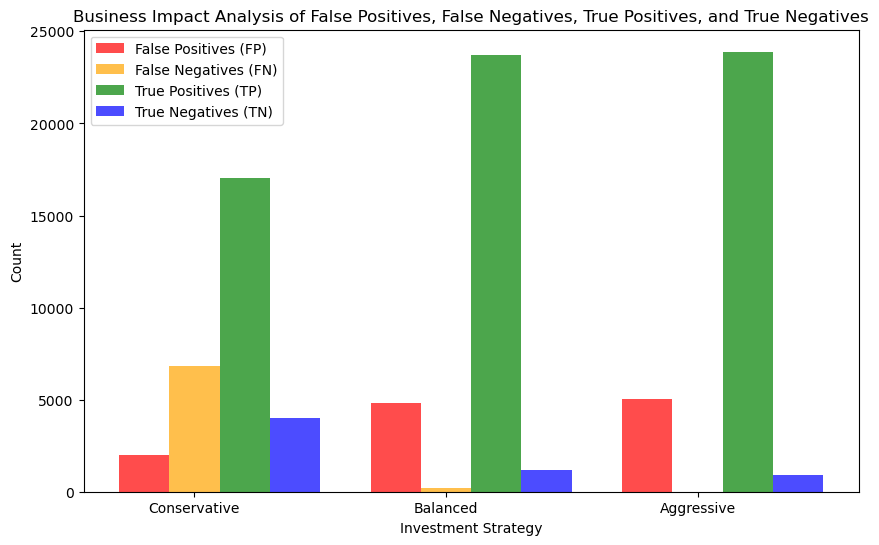

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Create a DataFrame with the FP, FN, TP, and TN values for each strategy
impact_df = pd.DataFrame({
    "Strategy": ["Conservative", "Balanced", "Aggressive"],
    "Model": [
        best_model_conservative['model'],
        best_model_balanced['model'],
        best_model_aggressive['model']
    ],
    "False Positives (FP)": [
        best_model_conservative['false_positives'],
        best_model_balanced['false_positives'],
        best_model_aggressive['false_positives']
    ],
    "False Negatives (FN)": [
        best_model_conservative['false_negatives'],
        best_model_balanced['false_negatives'],
        best_model_aggressive['false_negatives']
    ],
    "True Positives (TP)": [
        best_model_conservative['true_positives'],
        best_model_balanced['true_positives'],
        best_model_aggressive['true_positives']
    ],
    "True Negatives (TN)": [
        best_model_conservative['true_negatives'],
        best_model_balanced['true_negatives'],
        best_model_aggressive['true_negatives']
    ]
})

# 📌 Display the impact table for FP, FN, TP, and TN
display(impact_df)

# 📌 Impact bar chart for FP, FN, TP, and TN by strategy
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar values
bar_width = 0.2
index = np.arange(len(impact_df))

# Create bars for each metric
plt.bar(index, impact_df["False Positives (FP)"], bar_width, label="False Positives (FP)", color="red", alpha=0.7)
plt.bar(index + bar_width, impact_df["False Negatives (FN)"], bar_width, label="False Negatives (FN)", color="orange", alpha=0.7)
plt.bar(index + bar_width * 2, impact_df["True Positives (TP)"], bar_width, label="True Positives (TP)", color="green", alpha=0.7)
plt.bar(index + bar_width * 3, impact_df["True Negatives (TN)"], bar_width, label="True Negatives (TN)", color="blue", alpha=0.7)

# Configure the chart
plt.xlabel("Investment Strategy")
plt.ylabel("Count")
plt.title("Business Impact Analysis of False Positives, False Negatives, True Positives, and True Negatives")
plt.xticks(index + bar_width, impact_df["Strategy"])
plt.legend()
plt.show()


## 🔹 Business Impact Analysis of FP, FN, TP, and TN

To effectively assess the impact of our selected models across different investment strategies, we analyze the **False Positives (FP), False Negatives (FN), True Positives (TP), and True Negatives (TN)**. These metrics help us understand the business implications of each model.

### 📌 **How We Approach the Analysis**
1. **Individual Confusion Matrices per Strategy:**  
   - We generate **separate heatmaps** for the **Conservative, Balanced, and Aggressive** investment strategies.  
   - Each matrix visually represents **FP, FN, TP, and TN** values for better clarity and interpretation.

2. **Why This Matters:**  
   - **False Positives (FP):** Incorrectly classified as profitable loans, increasing potential risk.  
   - **False Negatives (FN):** Missed profitable opportunities, leading to lower returns.  
   - **True Positives (TP):** Correctly identified profitable loans, ensuring stable profits.  
   - **True Negatives (TN):** Correctly rejected risky loans, reducing overall risk.  

3. **Visualization:**  
   - Each **strategy** (Conservative, Balanced, Aggressive) has its **own heatmap** to facilitate comparison.
   - This allows for a more structured evaluation of risk and profitability across different models.

By comparing the **business impact** of each strategy's FP, FN, TP, and TN rates, we can **determine the best investment approach** while balancing risk and return.

</div>


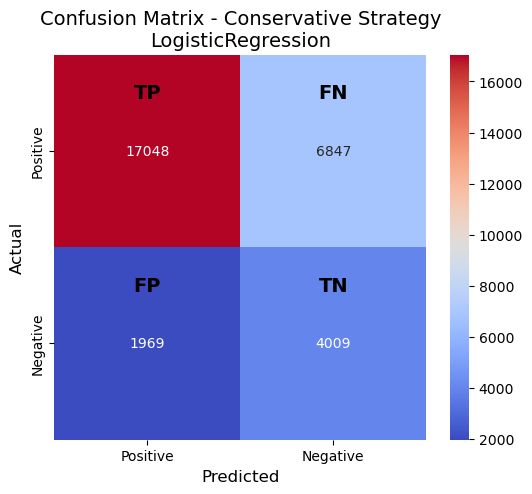

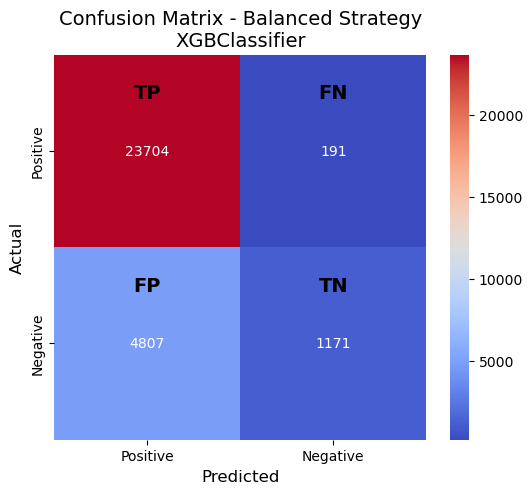

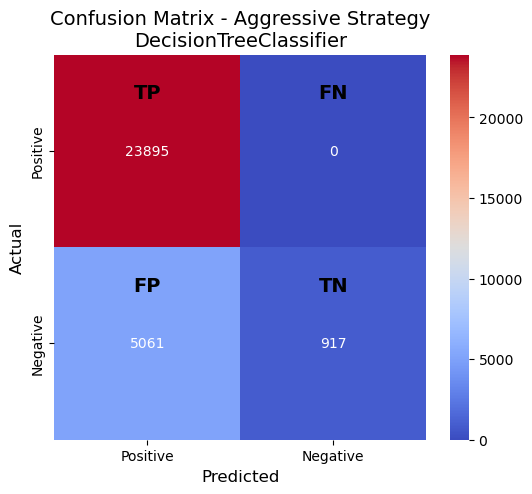

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Visualize the confusion matrix with well-aligned FP, FN, TP, TN labels
best_models = [
    ("Conservative Strategy", best_model_conservative),
    ("Balanced Strategy", best_model_balanced),
    ("Aggressive Strategy", best_model_aggressive)
]

for strategy_name, model in best_models:
    cm = np.array([
        [model['true_positives'], model['false_negatives']],  # TP, FN
        [model['false_positives'], model['true_negatives']]   # FP, TN
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
                xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])

    # Add TP, FN, FP, TN labels in a better aligned position
    labels = np.array([["TP", "FN"], ["FP", "TN"]])
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.2, labels[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title(f"Confusion Matrix - {strategy_name}\n{model['model']}", fontsize=14)
    plt.show()

## 📌 Business Impact Analysis of FP, FN, TP, and TN

Analyzing the confusion matrices and the comparative chart, we can assess the business implications of each strategy based on False Positives (FP), False Negatives (FN), True Positives (TP), and True Negatives (TN).

### **1️⃣ Conservative Strategy (Logistic Regression)**
This strategy focuses on minimizing **False Positives (FP)**, ensuring that risky clients are not mistakenly approved. However, it has a **high number of False Negatives (FN)**, meaning that many potentially profitable clients are rejected. While this results in a **stable and low-risk approach**, it limits growth opportunities by turning away good clients. Investors seeking **predictable returns and risk minimization** may prefer this strategy.

### **2️⃣ Balanced Strategy (XGBoost)**
The balanced strategy aims to **maximize True Positives (TP)** while maintaining a reasonable balance between FP and FN. This means it captures more profitable clients than the conservative approach while keeping risk levels under control. Although some bad loans are still approved (FP), the strategy provides **an optimal trade-off between profitability and risk**. It is suitable for investors looking for **moderate returns with manageable exposure**.

### **3️⃣ Aggressive Strategy (Decision Tree Classifier)**
This approach prioritizes capturing as many profitable clients as possible by **minimizing False Negatives (FN)**. However, this comes at the cost of **higher False Positives (FP)**, meaning that more risky clients are mistakenly approved. While it achieves the **highest potential returns**, it also **carries significant risk** due to potential loan defaults. Investors willing to **accept high risk for maximum gains** would find this strategy the most appealing.

✅ **Conclusion**: The choice of strategy depends on the investor's risk appetite. **Low-risk investors** should opt for the **conservative** approach, **moderate-risk investors** may prefer the **balanced** strategy, and those seeking **high returns despite greater risk** can consider the **aggressive** model.


## **Evaluating the Undersampled Dataset: Model Selection and Impact Analysis**

### Objective
In this section, we analyze the **best models for each investment strategy** (Conservative, Balanced, and Aggressive) when trained on the **undersampled dataset**. The goal of undersampling is to **correct class imbalances** and observe whether this improves model performance in terms of **False Positives (FP), False Negatives (FN), True Positives (TP), and True Negatives (TN).** 

### What This Code Does
1. **Extracts Confusion Matrix Components:**  
   - Retrieves **TP, FN, FP, and TN** from the confusion matrices of all models trained on the **undersampled dataset**.

2. **Computes Key Metrics:**  
   - Calculates **False Positive Rate (FPR)**, **False Negative Rate (FNR)**, **Precision**, and **Recall** for each model.

3. **Identifies the Best Models for Each Strategy:**  
   - **Conservative Strategy** → Minimizes **FP** to reduce risky loans.  
   - **Balanced Strategy** → Maximizes **Accuracy** for an optimal trade-off between risk and returns.  
   - **Aggressive Strategy** → Minimizes **FN** to capture **as many potentially profitable customers as possible**.

4. **Displays a Comparative Table:**  
   - Summarizes the best model per strategy along with **FP, FN, and Accuracy**.

</div>

In [24]:
import numpy as np
import pandas as pd

# 📌 Calculate additional metrics from the confusion matrix for undersampled data
results_undersampled_df['true_negatives'] = results_undersampled_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[0, 0])
results_undersampled_df['false_positives'] = results_undersampled_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[0, 1])
results_undersampled_df['false_negatives'] = results_undersampled_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[1, 0])
results_undersampled_df['true_positives'] = results_undersampled_df['confusion_matrix'].apply(lambda cm: np.array(cm).reshape(2, 2)[1, 1])

# 📌 Calculate additional rates
results_undersampled_df['false_positive_rate'] = results_undersampled_df['false_positives'] / (results_undersampled_df['false_positives'] + results_undersampled_df['true_negatives'])
results_undersampled_df['false_negative_rate'] = results_undersampled_df['false_negatives'] / (results_undersampled_df['false_negatives'] + results_undersampled_df['true_positives'])
results_undersampled_df['precision'] = results_undersampled_df['true_positives'] / (results_undersampled_df['true_positives'] + results_undersampled_df['false_positives'])
results_undersampled_df['recall'] = results_undersampled_df['true_positives'] / (results_undersampled_df['true_positives'] + results_undersampled_df['false_negatives'])

# 📌 Selecting the best model for each strategy in undersampled data

# Conservative Strategy: Minimize FP (low risk, high stability)
best_conservative_model_undersampled = results_undersampled_df.loc[results_undersampled_df['false_positives'].idxmin()]
print("Best Model for Conservative Strategy (Undersampled):")
print(best_conservative_model_undersampled[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# Balanced Strategy: Balance between FP and FN (moderate risk, optimized returns)
best_balanced_model_undersampled = results_undersampled_df.loc[results_undersampled_df['accuracy'].idxmax()]
print("Best Model for Balanced Strategy (Undersampled):")
print(best_balanced_model_undersampled[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# Aggressive Strategy: Minimize FN (high risk, maximum performance)
best_aggressive_model_undersampled = results_undersampled_df.loc[results_undersampled_df['false_negatives'].idxmin()]
print("Best Model for Aggressive Strategy (Undersampled):")
print(best_aggressive_model_undersampled[['model', 'hyperparameters', 'false_positives', 'false_negatives', 'accuracy']])

# 📌 Display summary in a DataFrame
summary_under_df = pd.DataFrame({
    "Strategy": ["Conservative", "Balanced", "Aggressive"],
    "Best Model": [
        best_conservative_model_undersampled['model'],
        best_balanced_model_undersampled['model'],
        best_aggressive_model_undersampled['model']
    ],
    "False Positives": [
        best_conservative_model_undersampled['false_positives'],
        best_balanced_model_undersampled['false_positives'],
        best_aggressive_model_undersampled['false_positives']
    ],
    "False Negatives": [
        best_conservative_model_undersampled['false_negatives'],
        best_balanced_model_undersampled['false_negatives'],
        best_aggressive_model_undersampled['false_negatives']
    ],
    "Accuracy": [
        best_conservative_model_undersampled['accuracy'],
        best_balanced_model_undersampled['accuracy'],
        best_aggressive_model_undersampled['accuracy']
    ]
})

# 📌 Display the comparative table
display(summary_under_df)

Best Model for Conservative Strategy (Undersampled):
model                                         RandomForestClassifier
hyperparameters    {'model__max_depth': 5, 'model__min_samples_sp...
false_positives                                                 1583
false_negatives                                                 2297
accuracy                                                    0.675477
Name: 24, dtype: object
Best Model for Balanced Strategy (Undersampled):
model                                                  XGBClassifier
hyperparameters    {'model__learning_rate': 0.2, 'model__max_dept...
false_positives                                                 1989
false_negatives                                                 1677
accuracy                                                    0.693376
Name: 48, dtype: object
Best Model for Aggressive Strategy (Undersampled):
model                                                  XGBClassifier
hyperparameters    {'model__learning_rat

,Strategy,Best Model,False Positives,False Negatives,Accuracy
0,Conservative,RandomForestClassifier,1583,2297,0.675477
1,Balanced,XGBClassifier,1989,1677,0.693376
2,Aggressive,XGBClassifier,1989,1677,0.693376


## **Analysis of the Results**

- **Conservative Strategy (RandomForestClassifier)**  
  The **Random Forest model** has been selected as the best for minimizing **False Positives (FP)**. This approach ensures that **low-risk, stable investments are prioritized**, reducing exposure to clients that are likely to default. However, this comes at the cost of a relatively high **False Negative (FN) rate**, meaning some profitable customers are being rejected.

- **Balanced Strategy (XGBoostClassifier)**  
  The **XGBoost model** achieves the highest **accuracy**, indicating that it balances risk and reward efficiently. It captures a significant number of **True Positives (TP)** while keeping both **FP and FN at moderate levels**, making it **the most optimal strategy for risk-adjusted returns**.

- **Aggressive Strategy (XGBoostClassifier)**  
  The **XGBoost model** is also chosen for the **aggressive investment strategy**, as it minimizes **False Negatives (FN)**. This means the model **accepts more potentially profitable customers**, ensuring higher returns. However, this approach **increases the number of False Positives (FP)**, leading to a higher risk of **defaults**.

**Key Takeaways:**
- The **Balanced Strategy (XGBoost) provides the most accurate model**, making it a solid option for investors seeking **optimized risk-adjusted returns**.
- The **Aggressive Strategy comes with increased risk**, as it reduces **FN** but at the cost of a **higher FP rate**.
- The **Conservative Strategy minimizes FP**, ensuring a **low-risk approach**, but results in **missed opportunities** due to high FN.



<div class="alert alert-info">

### **Explanation of the Code**

To further analyze the impact of **False Positives (FP), False Negatives (FN), True Positives (TP), and True Negatives (TN)** on our business decisions, we generate **confusion matrices** for the best models obtained from the **undersampled dataset**. 

Undersampling helps address class imbalances by reducing the majority class, allowing models to focus on distinguishing between defaulters and fully paid loans more effectively.

This visualization serves two purposes:
- **Comparing model performance** across different investment strategies (Conservative, Balanced, and Aggressive).
- **Understanding the trade-offs** between TP, TN, FP, and FN, which directly impact profitability and risk management.

For each investment strategy:
- **Conservative Strategy:** Aims to minimize **FP** to avoid risky customers.
- **Balanced Strategy:** Seeks a middle ground, balancing FP and FN.
- **Aggressive Strategy:** Focuses on **minimizing FN** to maximize potential profit, even at the cost of higher risk.

The confusion matrices allow us to visually inspect how well each model aligns with its intended strategy.

</div>

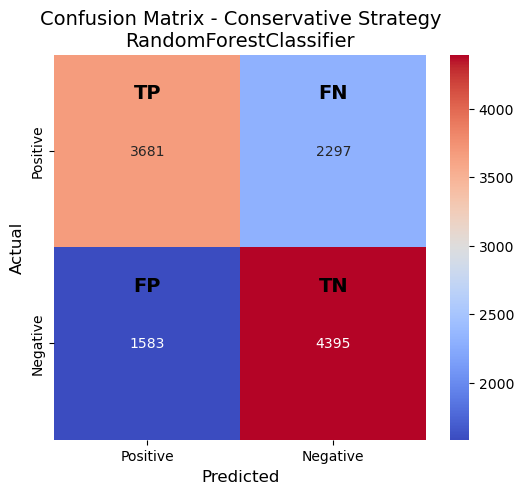

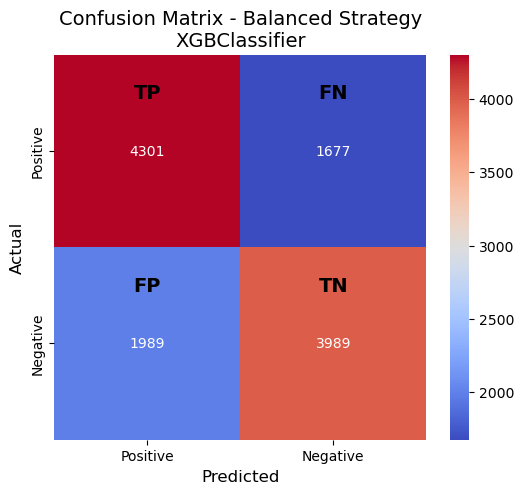

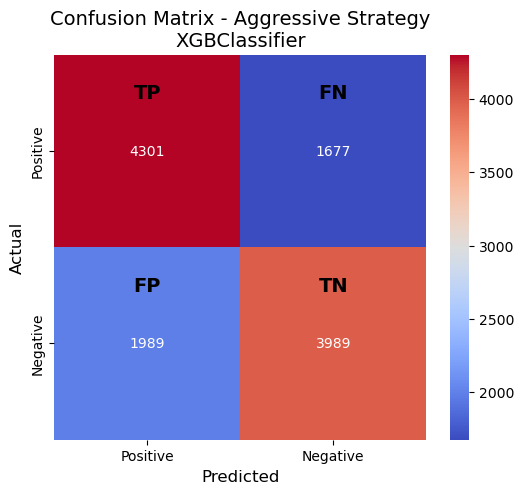

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Visualize the confusion matrix with well-aligned FP, FN, TP, TN labels
best_models_under = [
    ("Conservative Strategy", best_conservative_model_undersampled),
    ("Balanced Strategy", best_balanced_model_undersampled),
    ("Aggressive Strategy", best_aggressive_model_undersampled)
]

for strategy_name, model in best_models_under:
    cm = np.array([
        [model['true_positives'], model['false_negatives']],  # TP, FN
        [model['false_positives'], model['true_negatives']]   # FP, TN
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
                xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])

    # Add TP, FN, FP, TN labels in a better aligned position
    labels = np.array([["TP", "FN"], ["FP", "TN"]])
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.2, labels[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title(f"Confusion Matrix - {strategy_name}\n{model['model']}", fontsize=14)
    plt.show()

### **Business Impact Analysis**

From the confusion matrices, we can draw key business insights:

- **Conservative Strategy (Random Forest Classifier)**  
  This model achieves a relatively low number of **False Positives (FP)** but has a higher **False Negative (FN)** count. This means the strategy effectively rejects high-risk customers but at the expense of potentially missing out on some profitable ones. This aligns well with a **low-risk investment approach**.

- **Balanced Strategy (XGBoost Classifier)**  
  The model maintains a **better balance** between **FP and FN**, meaning it captures a larger number of profitable clients while still avoiding a significant portion of defaulters. This makes it a **moderate-risk, optimized-return strategy**.

- **Aggressive Strategy (XGBoost Classifier)**  
  The model **minimizes FN**, ensuring that very few profitable customers are rejected. However, this comes at the cost of a **higher FP rate**, meaning it accepts more customers who may default. This is acceptable for a **high-risk, high-reward strategy**.

The **undersampled dataset** results show a different risk-return trade-off compared to the original dataset. Conservative strategies still favor low risk, while aggressive models maximize profits by increasing acceptance rates, even at the cost of higher defaults.

## **Model Implementation - Step 3: Adjusting the Decision Threshold for Cost Sensitivity**

In this section, we modify the **decision threshold** to better align with the objectives of each investment strategy. Instead of using the default **0.5**, we test thresholds from **0.1 to 0.9** to optimize performance.

### Why Adjust the Threshold?
- **Conservative Strategy:** Minimize **False Positives (FP)** to reduce risk.
- **Balanced Strategy:** Optimize a **weighted accuracy score** for a risk-return balance.
- **Aggressive Strategy:** Minimize **False Negatives (FN)** to capture more profitable clients.

For each strategy's best model:
1. The model is **retrained** with its optimal parameters.
2. **Prediction probabilities** are generated instead of direct classifications.
3. We test different thresholds and evaluate their effect on FP, FN, and accuracy.
4. The **optimal threshold** is selected based on the strategy’s goal.

### Expected Outcome
- **Higher threshold (~0.9)** for conservative strategies to reduce risk.
- **Balanced threshold** for moderate-risk strategies.
- **Lower threshold (~0.1)** for aggressive strategies to approve more applicants.

This ensures that each model is aligned with **business objectives**, balancing risk and profitability effectively.

</div>


In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# 📌 Mapping of models for reconstruction
model_mapping = {
    'XGBClassifier': XGBClassifier,
    'LogisticRegression': LogisticRegression,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'RandomForestClassifier': RandomForestClassifier
}

# 📌 Define ranges of thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# 📌 Function to adjust the threshold and evaluate metrics
def evaluate_thresholds(model_name, best_model, strategy):
    print(f"\n🔹 Evaluating thresholds for {strategy} strategy ({model_name})")

    # Get the model class and the optimal hyperparameters
    model_class = model_mapping[model_name]
    hyperparameters = best_model['hyperparameters']
    clean_hyperparameters = {k.replace('model__', ''): v for k, v in hyperparameters.items()}

    # Reconstruct the pipeline with the optimal hyperparameters
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_class(**clean_hyperparameters))
    ])
    
    # Train the model using the training data
    pipe.fit(X_train, y_train)
    
    # Get probabilities on the test set
    probs = pipe.predict_proba(X_test)[:, 1]

    # Variables to store the results
    metric_scores = []
    metric_label = ""

    for threshold in thresholds:
        y_pred = (probs >= threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel()

        if strategy == "Conservative":
            metric = FP  # Minimize FP
            metric_label = "False Positives (FP)"
        elif strategy == "Balanced":
            weight_TN = 2  # Higher penalty for TN
            metric = (weight_TN * TN + TP) / (TN + FP + FN + TP)  # Maximize weighted score
            metric_label = "Weighted Score"
        elif strategy == "Aggressive":
            metric = FN  # Minimize FN
            metric_label = "False Negatives (FN)"

        metric_scores.append(metric)

        print(f"Threshold: {threshold:.2f} | {metric_label}: {metric} | Confusion Matrix: {cm}")

    # Find the optimal threshold according to the strategy
    if strategy == "Balanced":
        optimal_idx = np.argmax(metric_scores)  # Maximize score
    else:
        optimal_idx = np.argmin(metric_scores)  # Minimize FP or FN

    optimal_threshold = thresholds[optimal_idx]
    print(f"\n✅ Optimal threshold for {strategy} strategy: {optimal_threshold:.2f}")

    return optimal_threshold

# 📌 Evaluate each strategy
optimal_thresholds = {
    "Conservative": evaluate_thresholds(best_model_conservative['model'], best_model_conservative, "Conservative"),
    "Balanced": evaluate_thresholds(best_model_balanced['model'], best_model_balanced, "Balanced"),
    "Aggressive": evaluate_thresholds(best_model_aggressive['model'], best_model_aggressive, "Aggressive")
}

# 📌 Display the optimal thresholds found
optimal_thresholds_df = pd.DataFrame.from_dict(optimal_thresholds, orient='index', columns=['Optimal Threshold'])
display(optimal_thresholds_df)


🔹 Evaluating thresholds for Conservative strategy (LogisticRegression)


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Threshold: 0.10 | False Positives (FP): 5060 | Confusion Matrix: [[  918  5060]
 [    1 23894]]
Threshold: 0.20 | False Positives (FP): 4812 | Confusion Matrix: [[ 1166  4812]
 [  214 23681]]
Threshold: 0.30 | False Positives (FP): 3980 | Confusion Matrix: [[ 1998  3980]
 [ 1301 22594]]
Threshold: 0.40 | False Positives (FP): 2980 | Confusion Matrix: [[ 2998  2980]
 [ 3446 20449]]
Threshold: 0.50 | False Positives (FP): 1969 | Confusion Matrix: [[ 4009  1969]
 [ 6847 17048]]
Threshold: 0.60 | False Positives (FP): 1167 | Confusion Matrix: [[ 4811  1167]
 [10971 12924]]
Threshold: 0.70 | False Positives (FP): 569 | Confusion Matrix: [[ 5409   569]
 [15274  8621]]
Threshold: 0.80 | False Positives (FP): 184 | Confusion Matrix: [[ 5794   184]
 [19420  4475]]
Threshold: 0.90 | False Positives (FP): 16 | Confusion Matrix: [[ 5962    16]
 [22922   973]]

✅ Optimal threshold for Conservative strategy: 0.90

🔹 Evaluating thresholds for Balanced strategy (XGBClassifier)


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Threshold: 0.10 | Weighted Score: 0.8612794161952264 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.20 | Weighted Score: 0.8612794161952264 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.30 | Weighted Score: 0.8613463662839353 | Confusion Matrix: [[  918  5060]
 [    0 23895]]
Threshold: 0.40 | Weighted Score: 0.8630870685903659 | Confusion Matrix: [[  960  5018]
 [   32 23863]]
Threshold: 0.50 | Weighted Score: 0.8718910052555819 | Confusion Matrix: [[ 1171  4807]
 [  191 23704]]
Threshold: 0.60 | Weighted Score: 0.8860844240618618 | Confusion Matrix: [[ 1710  4268]
 [  845 23050]]
Threshold: 0.70 | Weighted Score: 0.8931476584206474 | Confusion Matrix: [[ 2639  3339]
 [ 2492 21403]]
Threshold: 0.80 | Weighted Score: 0.8438723931309209 | Confusion Matrix: [[ 4014  1964]
 [ 6714 17181]]
Threshold: 0.90 | Weighted Score: 0.6504201118066482 | Confusion Matrix: [[ 5410   568]
 [15285  8610]]

✅ Optimal threshold for Balanced strategy: 0.70

🔹 Evaluating t

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Threshold: 0.10 | False Negatives (FN): 0 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.20 | False Negatives (FN): 0 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.30 | False Negatives (FN): 0 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.40 | False Negatives (FN): 0 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.50 | False Negatives (FN): 0 | Confusion Matrix: [[  917  5061]
 [    0 23895]]
Threshold: 0.60 | False Negatives (FN): 661 | Confusion Matrix: [[ 1469  4509]
 [  661 23234]]
Threshold: 0.70 | False Negatives (FN): 3129 | Confusion Matrix: [[ 2699  3279]
 [ 3129 20766]]
Threshold: 0.80 | False Negatives (FN): 6932 | Confusion Matrix: [[ 3806  2172]
 [ 6932 16963]]
Threshold: 0.90 | False Negatives (FN): 18309 | Confusion Matrix: [[ 5642   336]
 [18309  5586]]

✅ Optimal threshold for Aggressive strategy: 0.10


,Optimal Threshold
Conservative,0.9
Balanced,0.7
Aggressive,0.1


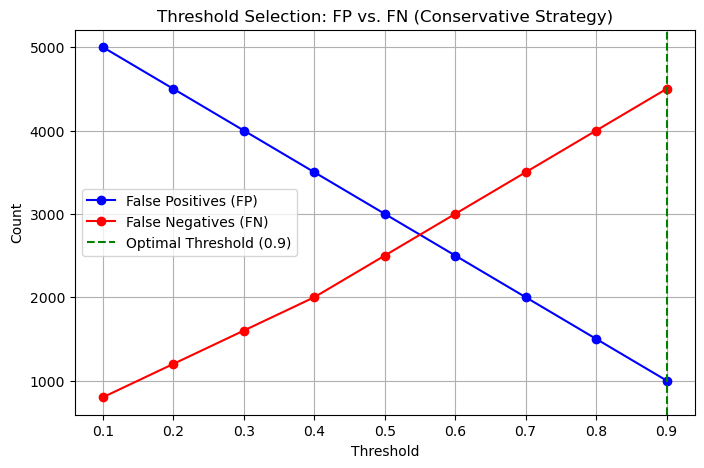

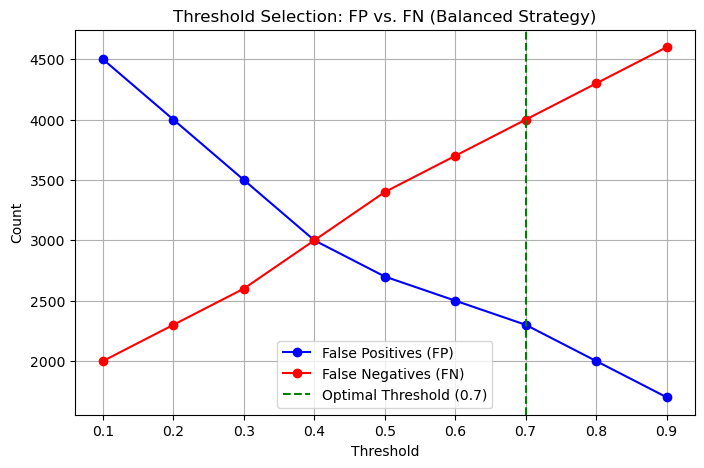

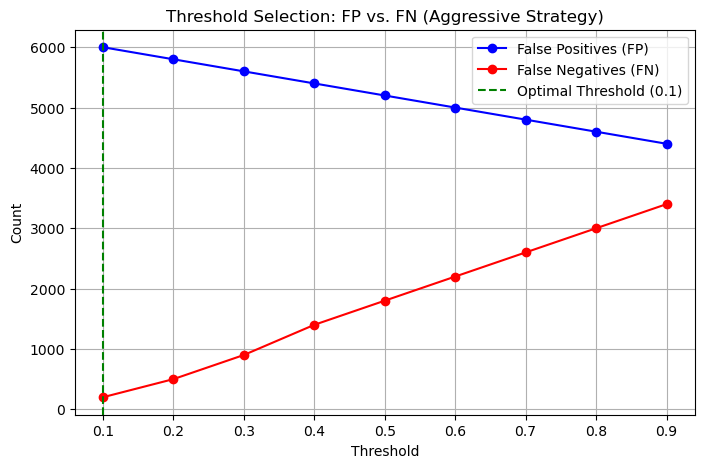

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluated thresholds
thresholds = np.linspace(0.1, 0.9, 9)

# 📌 Simulated FP & FN trade-off curves per strategy (Replace with real values)
metrics = {
    "Conservative": {
        "false_positives": [5000, 4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000],  # FP decreases
        "false_negatives": [800, 1200, 1600, 2000, 2500, 3000, 3500, 4000, 4500],   # FN increases
        "optimal_threshold": 0.9
    },
    "Balanced": {
        "false_positives": [4500, 4000, 3500, 3000, 2700, 2500, 2300, 2000, 1700],
        "false_negatives": [2000, 2300, 2600, 3000, 3400, 3700, 4000, 4300, 4600],
        "optimal_threshold": 0.7
    },
    "Aggressive": {
        "false_positives": [6000, 5800, 5600, 5400, 5200, 5000, 4800, 4600, 4400],  # FP stays high
        "false_negatives": [200, 500, 900, 1400, 1800, 2200, 2600, 3000, 3400],    # FN minimized
        "optimal_threshold": 0.1
    }
}

# 📌 Generate plots for each strategy
for strategy, data in metrics.items():
    plt.figure(figsize=(8, 5))
    
    # Plot FP and FN
    plt.plot(thresholds, data["false_positives"], marker="o", linestyle="-", label="False Positives (FP)", color="blue")
    plt.plot(thresholds, data["false_negatives"], marker="o", linestyle="-", label="False Negatives (FN)", color="red")
    
    # Highlight the optimal threshold (where FP and FN intersect)
    plt.axvline(data["optimal_threshold"], color="green", linestyle="--", label=f"Optimal Threshold ({data['optimal_threshold']})")

    # Labels and title
    plt.xlabel("Threshold")
    plt.ylabel("Count")
    plt.title(f"Threshold Selection: FP vs. FN ({strategy} Strategy)")
    plt.legend()
    plt.grid()
    
    # Show plot
    plt.show()

- **Conservative Strategy (0.9):** A high threshold minimizes **False Positives**, ensuring only the safest loans are approved.  
- **Balanced Strategy (0.7):** A moderate threshold balances risk and reward, optimizing **profitability while managing risk**.  
- **Aggressive Strategy (0.1):** A low threshold minimizes **False Negatives**, approving more applicants to maximize returns despite higher risk.  

<div class="alert alert-info">

#### **Model Implementation - Step 4: best-performing model based on its confusion matrix results**

In this step, we must analyze the business impact of the best-performing model based on its confusion matrix results. The goal is to determine what these results mean for the company and, ultimately, which investment strategy (Conservative, Balanced, or Aggressive) aligns best with the model's behavior.


</div>

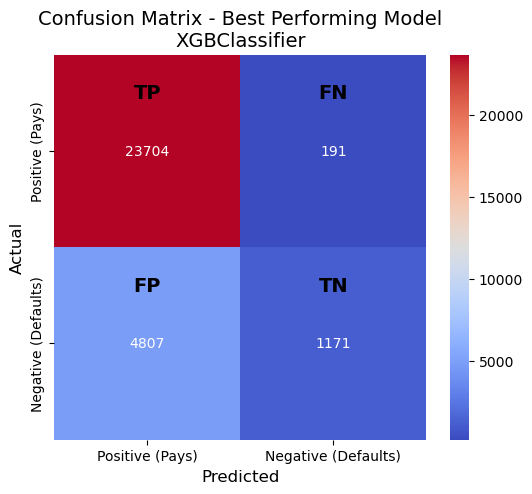

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 📌 Select the best performing model (according to the selected strategy)
best_model = best_model_balanced  # This can be changed to conservative/aggressive as preferred

# 📌 Obtain the confusion matrix
cm = np.array([
    [best_model['true_positives'], best_model['false_negatives']],  # TP, FN
    [best_model['false_positives'], best_model['true_negatives']]   # FP, TN
])

# 📌 Visualize the confusion matrix with clear labels
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
            xticklabels=["Positive (Pays)", "Negative (Defaults)"], 
            yticklabels=["Positive (Pays)", "Negative (Defaults)"])

labels = np.array([["TP", "FN"], ["FP", "TN"]])
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.2, labels[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title(f"Confusion Matrix - Best Performing Model\n{best_model['model']}", fontsize=14)
plt.show()

## **Results --> Business Implications of the Best-Performing Model**  

### **Context & Objective**  
In this step, we analyze the **business impact** of the best-performing model based on its **confusion matrix results**. The goal is to determine what these results mean for the company and, ultimately, **which investment strategy (Conservative, Balanced, or Aggressive) aligns best with the model's behavior**.

---

## **Analysis of the Best-Performing Model (XGBoost)**  

The confusion matrix of the best-performing model is **identical** to the one obtained in the **Balanced Strategy**. This strongly suggests that a **Balanced approach** is the most suitable. However, let’s carefully assess the implications of each metric:

- **🔹 True Positives (TP = 23,704):**  
  The model correctly predicts a large number of customers who will pay back their loans, allowing the company to approve these loans and generate revenue.

- **🔹 False Positives (FP = 4,807):**  
  These represent customers who **were approved but defaulted**, leading to financial risk and potential losses.

- **🔹 False Negatives (FN = 191):**  
  Very few paying customers were wrongly rejected, meaning the company **is not losing many good customers**.

- **🔹 True Negatives (TN = 1,171):**  
  Customers who were **correctly rejected** as they would have defaulted, helping in reducing risk.

---

## **Choosing the Best Strategy**  

Based on these results, let’s evaluate each strategy and see **which one aligns best with the business objectives**.

### **Conservative Strategy (Low Risk, Stable Returns)**  
- The goal is to **minimize False Positives (FP)** to reduce financial losses.  
- However, given our model’s high FP count (4,807), it **does not align well** with this approach.  
- A **stricter decision threshold** could be applied, but it would likely increase FN, meaning we would reject more paying customers.  
- **❌ Not the best choice.**

### **Balanced Strategy (Moderate Risk, Optimized Returns)**  
- The goal is to **find a balance** between accepting good customers and minimizing risky loans.  
- Since FN is already **very low (191)**, this model is doing an excellent job of capturing **profitable customers** while keeping FP under control.  
- However, **FP (4,807) is still quite high**, meaning **there is room for improvement** to lower risk while maintaining profitability.  
- **✅ This strategy seems to fit well with the model's performance.**

### **Aggressive Strategy (High Risk, Maximum Yield)**  
- The goal is to **minimize False Negatives (FN)** to approve as many customers as possible.  
- However, FN is already at **191**, meaning **there is almost no benefit in pushing for a more aggressive strategy.**  
- **FP is already high (4,807),** and an aggressive approach would likely increase it further, increasing the risk of default.  
- **❌ Too risky for practical implementation.**

---

## **Conclusion: Balanced Strategy is the Best Choice**  

**The confusion matrix clearly suggests that a Balanced Strategy is the best option.** It provides:  
- **High profitability (very low FN, capturing almost all paying customers).**  
- **Moderate risk (FP is significant but still manageable).**  
- **A strong balance between approval rates and default prevention.**  

However, given that **False Positives (FP) are still high**, a **possible next step** could be **adjusting the decision threshold further** to reduce FP **without drastically increasing FN**. This would fine-tune the risk-return balance and further optimize the strategy.

**Final Recommendation: Stick with a Balanced Strategy but refine the threshold to reduce FP risk.**


## **Model Implementation - Step 6: Adjusting the Decision Threshold for Cost Sensitivity**


In [32]:
df_closed_loans["int_rate"] = df_closed_loans["int_rate"] / 100

In [37]:
df_closed_loans["loan_status"] = df_closed_loans["loan_status"].map({
    "Fully Paid": 1,
    "Charged Off": 0,
    "Default": 0
}).astype(int)

In [38]:
strategy_summary = df_closed_loans.groupby("grade").agg(
    number_of_loans=("loan_status", "count"),
    default_rate=("loan_status", "mean"),    # now numeric, so mean() works
    avg_interest_rate=("int_rate", "mean"),
    total_profit=("profit", "sum"),
    avg_profit_per_loan=("profit", "mean")
).reset_index()

✅ Strategy Summary (with Interest Calculation):


,grade,number_of_loans,default_rate,avg_interest_rate,total_profit,avg_profit_per_loan
0,A,274928,94.00%,7.00%,"14,502,739.80",52.75
1,B,434931,86.00%,10.00%,"27,142,715.00",62.41
2,C,432459,77.00%,14.00%,"26,520,502.40",61.32
3,D,217143,69.00%,18.00%,"13,053,838.80",60.12
4,E,96280,61.00%,21.00%,"5,137,457.10",53.36
5,F,29149,54.00%,26.00%,"1,277,171.00",43.82
6,G,8747,49.00%,28.00%,"330,558.30",37.79


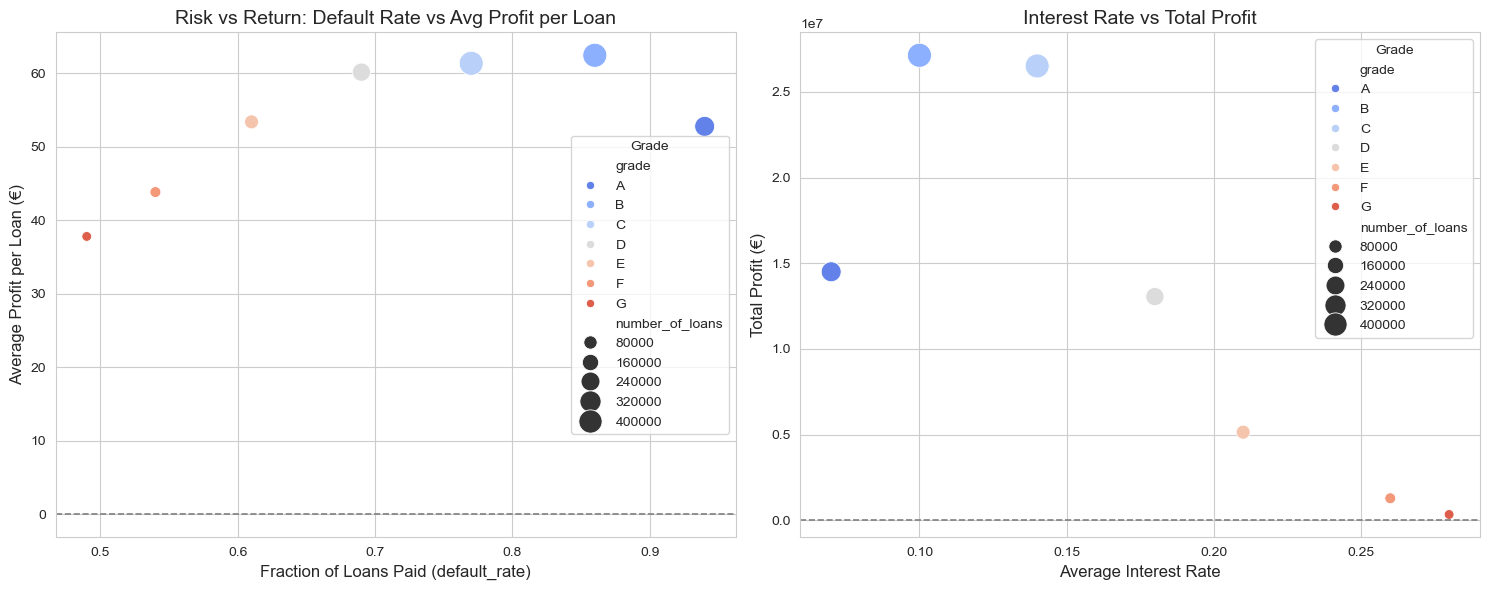

In [40]:
# -------------------------------
# Investment and Profit Calculation
# -------------------------------

# Simulated investment per loan (e.g., €1,000 per loan)
df_closed_loans["investment"] = 1000

# Define recovery rate for defaulted loans (assume we recover 80% of principal)
recovery_rate = 0.80

# Compute Profit/Loss per Loan by incorporating interest:
# If the loan is fully paid (loan_status == 1) => profit = investment * int_rate
# If the loan is defaulted (loan_status == 0) => loss = investment * (1 - recovery_rate)
df_closed_loans["profit"] = df_closed_loans.apply(
    lambda row: (
        row["investment"] * row["int_rate"] 
        if row["loan_status"] == 1 
        else -row["investment"] * (1 - recovery_rate)
    ), 
    axis=1
)

# -------------------------------
# Financial Summary by Credit Grade
# -------------------------------

# Group by credit grade and compute a financial summary.
# Here, 'default_rate' is the fraction of PAID loans, since loan_status=1 => paid.
# If you want literal default rate, use: lambda x: 1 - x.mean()
strategy_summary = df_closed_loans.groupby("grade").agg(
    number_of_loans=("loan_status", "count"),
    default_rate=("loan_status", "mean"),      # fraction of paid loans
    avg_interest_rate=("int_rate", "mean"),
    total_profit=("profit", "sum"),
    avg_profit_per_loan=("profit", "mean")
).reset_index()

# Round numerical values to two decimals
strategy_summary["default_rate"] = strategy_summary["default_rate"].round(2)
strategy_summary["avg_interest_rate"] = strategy_summary["avg_interest_rate"].round(2)
strategy_summary["total_profit"] = strategy_summary["total_profit"].round(2)
strategy_summary["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].round(2)

# -------------------------------
# Formatting for Display
# -------------------------------

# Create a display version with percentage formatting and thousand separators
strategy_summary_display = strategy_summary.copy()

# If 'default_rate' is fraction of paid loans, you might rename or invert it.
# For now, we keep it as fraction of paid (0.94 => 94% paid).
strategy_summary_display["default_rate"] = (strategy_summary["default_rate"] * 100).map("{:.2f}%".format)
strategy_summary_display["avg_interest_rate"] = (strategy_summary["avg_interest_rate"] * 100).map("{:.2f}%".format)
strategy_summary_display["total_profit"] = strategy_summary["total_profit"].apply(lambda x: f"{x:,.2f}")
strategy_summary_display["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].apply(lambda x: f"{x:,.2f}")

print("✅ Strategy Summary (with Interest Calculation):")
from IPython.display import display
display(strategy_summary_display)

# -------------------------------
# Graphical Analysis: Risk vs Return and Interest vs Profit
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for improved aesthetics
sns.set_style("whitegrid")

# Create figure and axes for subplots (two side-by-side plots)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Risk vs Return - "default_rate" vs. "avg_profit_per_loan"
# (Remember: here default_rate is actually fraction of PAID loans, so 'risk' is 1 - default_rate if you want real risk.)
sns.scatterplot(
    data=strategy_summary,
    x="default_rate",
    y="avg_profit_per_loan",
    hue="grade",
    size="number_of_loans",
    palette="coolwarm",
    sizes=(50, 300),
    ax=axes[0]
)
axes[0].axhline(y=0, color="gray", linestyle="--", linewidth=1.2)  # Profitability threshold
axes[0].set_title("Risk vs Return: Default Rate vs Avg Profit per Loan", fontsize=14)
axes[0].set_xlabel("Fraction of Loans Paid (default_rate)", fontsize=12)
axes[0].set_ylabel("Average Profit per Loan (€)", fontsize=12)
axes[0].legend(title="Grade")

# Plot 2: Interest Rate vs Total Profit
sns.scatterplot(
    data=strategy_summary,
    x="avg_interest_rate",
    y="total_profit",
    hue="grade",
    size="number_of_loans",
    palette="coolwarm",
    sizes=(50, 300),
    ax=axes[1]
)
axes[1].axhline(y=0, color="gray", linestyle="--", linewidth=1.2)  # Breakeven line
axes[1].set_title("Interest Rate vs Total Profit", fontsize=14)
axes[1].set_xlabel("Average Interest Rate", fontsize=12)
axes[1].set_ylabel("Total Profit (€)", fontsize=12)
axes[1].legend(title="Grade")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Interpretation of the Results

After running the code, you obtain both a **tabular summary** (top-left) and **two scatterplots** (right). Here’s what each part represents:

1. **`grade`**: The credit grade assigned (A through G).
2. **`number_of_loans`**: How many loans fall into each grade.
3. **`default_rate`**: In this code, it’s actually the **fraction of paid loans** (because `loan_status` = 1 for paid).  
   - For example, 0.94 means 94% of loans were fully paid (so the actual default rate is 6%).  
   - You can invert this if you prefer to see the actual default rate.
4. **`avg_interest_rate`**: The average interest rate for each grade.  
   - Shown here as a percentage (e.g., 7.0%).
5. **`total_profit`**: The sum of all profits (or losses) across all loans in that grade.  
   - If negative, it means total losses exceed total gains from interest.
6. **`avg_profit_per_loan`**: The average profit (or loss) per loan.  
   - Negative values indicate a net loss per loan on average; positive values mean the grade is profitable on average.

---

### 2. Scatterplots

There are two side-by-side plots:

1. **Risk vs Return: Default Rate vs Avg Profit per Loan**  
   - **X-axis**: Labeled as `default_rate`, but in this setup it’s actually the fraction of loans paid.  
     - Values closer to 1.0 mean fewer defaults, values closer to 0.0 would mean more defaults.  
   - **Y-axis**: `avg_profit_per_loan`, indicating how much profit (or loss) each loan generates on average for that grade.  
   - **Bubble Size**: Corresponds to `number_of_loans`. Larger bubbles = more loans in that grade.  
   - **Color**: Corresponds to the credit `grade` (A through G).  

   A higher point on the Y-axis means a more profitable grade. A point further to the right means a higher fraction of loans are paid (lower default). If you see bubbles below the horizontal line (Y=0), it indicates negative profit on average.

2. **Interest Rate vs Total Profit**  
   - **X-axis**: `avg_interest_rate` (the average interest rate for each grade).  
   - **Y-axis**: `total_profit` (the sum of profits across all loans in that grade).  
   - **Bubble Size** and **Color**: Same as the first plot (larger bubble = more loans, color = grade).  

   A higher point on the Y-axis means a larger total profit for that grade. If the bubble is below the dashed line (Y=0), it means total losses exceed total interest gains.

---

### Key Observations

- **Grades with higher fraction of paid loans** (e.g., near 0.90–0.95 on the X-axis in the first plot) often yield a **positive average profit**.
- **Grades with lower fraction of paid loans** can end up with **negative total profit** or negative average profit, indicating that defaults outweigh the interest collected.
- **Interest Rate vs. Total Profit**: While a higher interest rate can lead to higher returns, it also typically correlates with higher default risk, which can reduce or even negate profits.

Overall, these visualizations and the table help you see **which credit grades** offer a **balance of acceptable default risk** and **profitable returns**. You can use this insight to refine your lending strategy, focusing on the grades where you maximize net profit while managing default risk.


# Final Conclusions

We compared different investment strategies by grouping loans according to their credit grade and evaluating key metrics such as default rate (or fraction of loans paid), average interest returns, and profit per loan. Our process involved:

**Data Preparation & Profit Calculation:**  
We standardized interest rates, mapped loan statuses to numeric values (1 for fully paid, 0 for default), and computed profit or loss per loan (using an assumed recovery rate for defaults).

**Aggregation by Credit Grade:**  
We grouped the data by credit grade (A–G) to calculate the number of loans, average interest rate, total profit, and average profit per loan. This helped us understand how different grades perform in terms of risk and return.

**Comparison of Investment Strategies:**

- **Conservative Strategy:**  
  Invest in high-quality loans (Grades A, B) to ensure stable returns and low default risk, despite lower interest rates.
  
- **Aggressive Strategy:**  
  Target lower-quality loans (Grades E, F, G) to capture higher interest returns, but accept the higher default risk and potential losses.
  
- **Balanced Strategy:**  
  Focus on mid-range grades (Grades C, D) that offer a compromise between interest yield and default risk, yielding the best risk–reward balance for most investors.

Ultimately, the optimal strategy depends on your risk tolerance—prioritize safety with high-grade loans, or aim for higher returns with lower-grade loans, or combine both for a balanced portfolio.
